# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset

In [2]:
path = '/kaggle/input/air-quality-index-in-jakarta-2010-2021/ispu_dki1.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   object 
 2   pm10      4171 non-null   float64
 3   so2       4208 non-null   float64
 4   co        4233 non-null   float64
 5   o3        4180 non-null   float64
 6   no2       4190 non-null   float64
 7   max       4374 non-null   float64
 8   critical  4273 non-null   object 
 9   categori  4383 non-null   object 
 10  pm25      365 non-null    float64
dtypes: float64(7), object(4)
memory usage: 376.8+ KB


* pm1o : Particulate matter one of the measured parameters
* s02  : Sulfide (in the form of SO2) one of the parameters measured
* co   : Carbon Monoxide one of the parameters measured
* 03   : Ozone is one of the measured parameters
* no2  : Nitrogen dioxide one of the parameters measured
* max  : The highest measured value of all parameters measured at the same time

In [5]:
df = df[["pm10", "so2", "co", "o3", "no2", "max", "categori"]]

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3950 entries, 0 to 4382
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      3950 non-null   float64
 1   so2       3950 non-null   float64
 2   co        3950 non-null   float64
 3   o3        3950 non-null   float64
 4   no2       3950 non-null   float64
 5   max       3950 non-null   float64
 6   categori  3950 non-null   object 
dtypes: float64(6), object(1)
memory usage: 246.9+ KB


In [7]:
X = df[["pm10", "so2", "co", "o3", "no2", "max"]]
y = df["categori"]

In [8]:
# Melihat jumlah data per kelas
class_counts = y.value_counts()
print(class_counts)

categori
SEDANG         2877
BAIK            928
TIDAK SEHAT     145
Name: count, dtype: int64


## Encoding Categorical Variables

In [9]:
# rename labels
df = df.replace({'SEDANG': 0, 'BAIK': 1, 'TIDAK SEHAT': 2})
df

,pm10,so2,co,o3,no2,max,categori
0,60.0,4.0,73.0,27.0,14.0,73.0,0
1,32.0,2.0,16.0,33.0,9.0,33.0,1
2,27.0,2.0,19.0,20.0,9.0,27.0,1
3,22.0,2.0,16.0,15.0,6.0,22.0,1
4,25.0,2.0,17.0,15.0,8.0,25.0,1
...,...,...,...,...,...,...,...
4378,52.0,61.0,15.0,20.0,15.0,71.0,0
4379,51.0,53.0,15.0,18.0,13.0,65.0,0
4380,31.0,54.0,10.0,24.0,11.0,54.0,0
4381,55.0,53.0,16.0,23.0,14.0,71.0,0


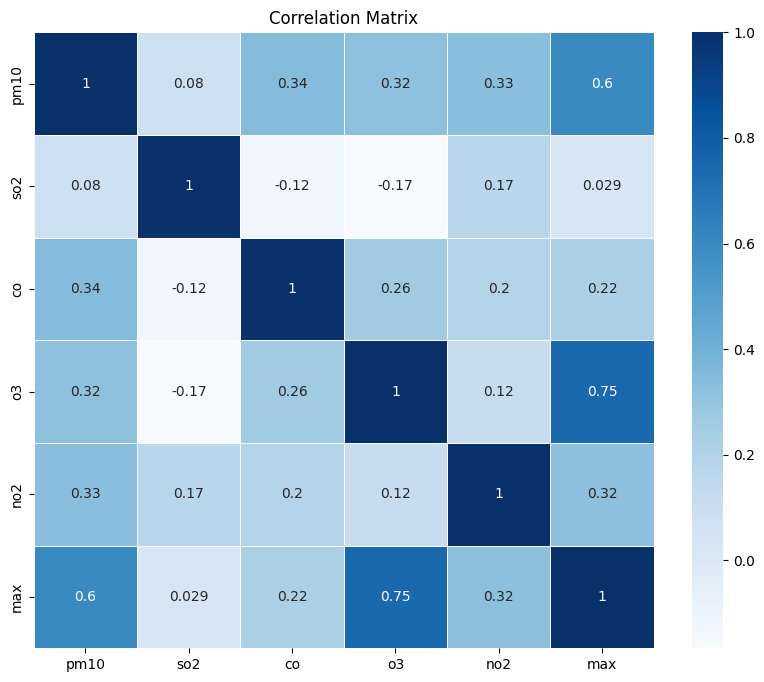

In [10]:
# Menghitung matriks korelasi
correlation_matrix = X.corr()
# print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [11]:
num_vars = ["pm10", "so2", "co", "o3", "no2", "max"]

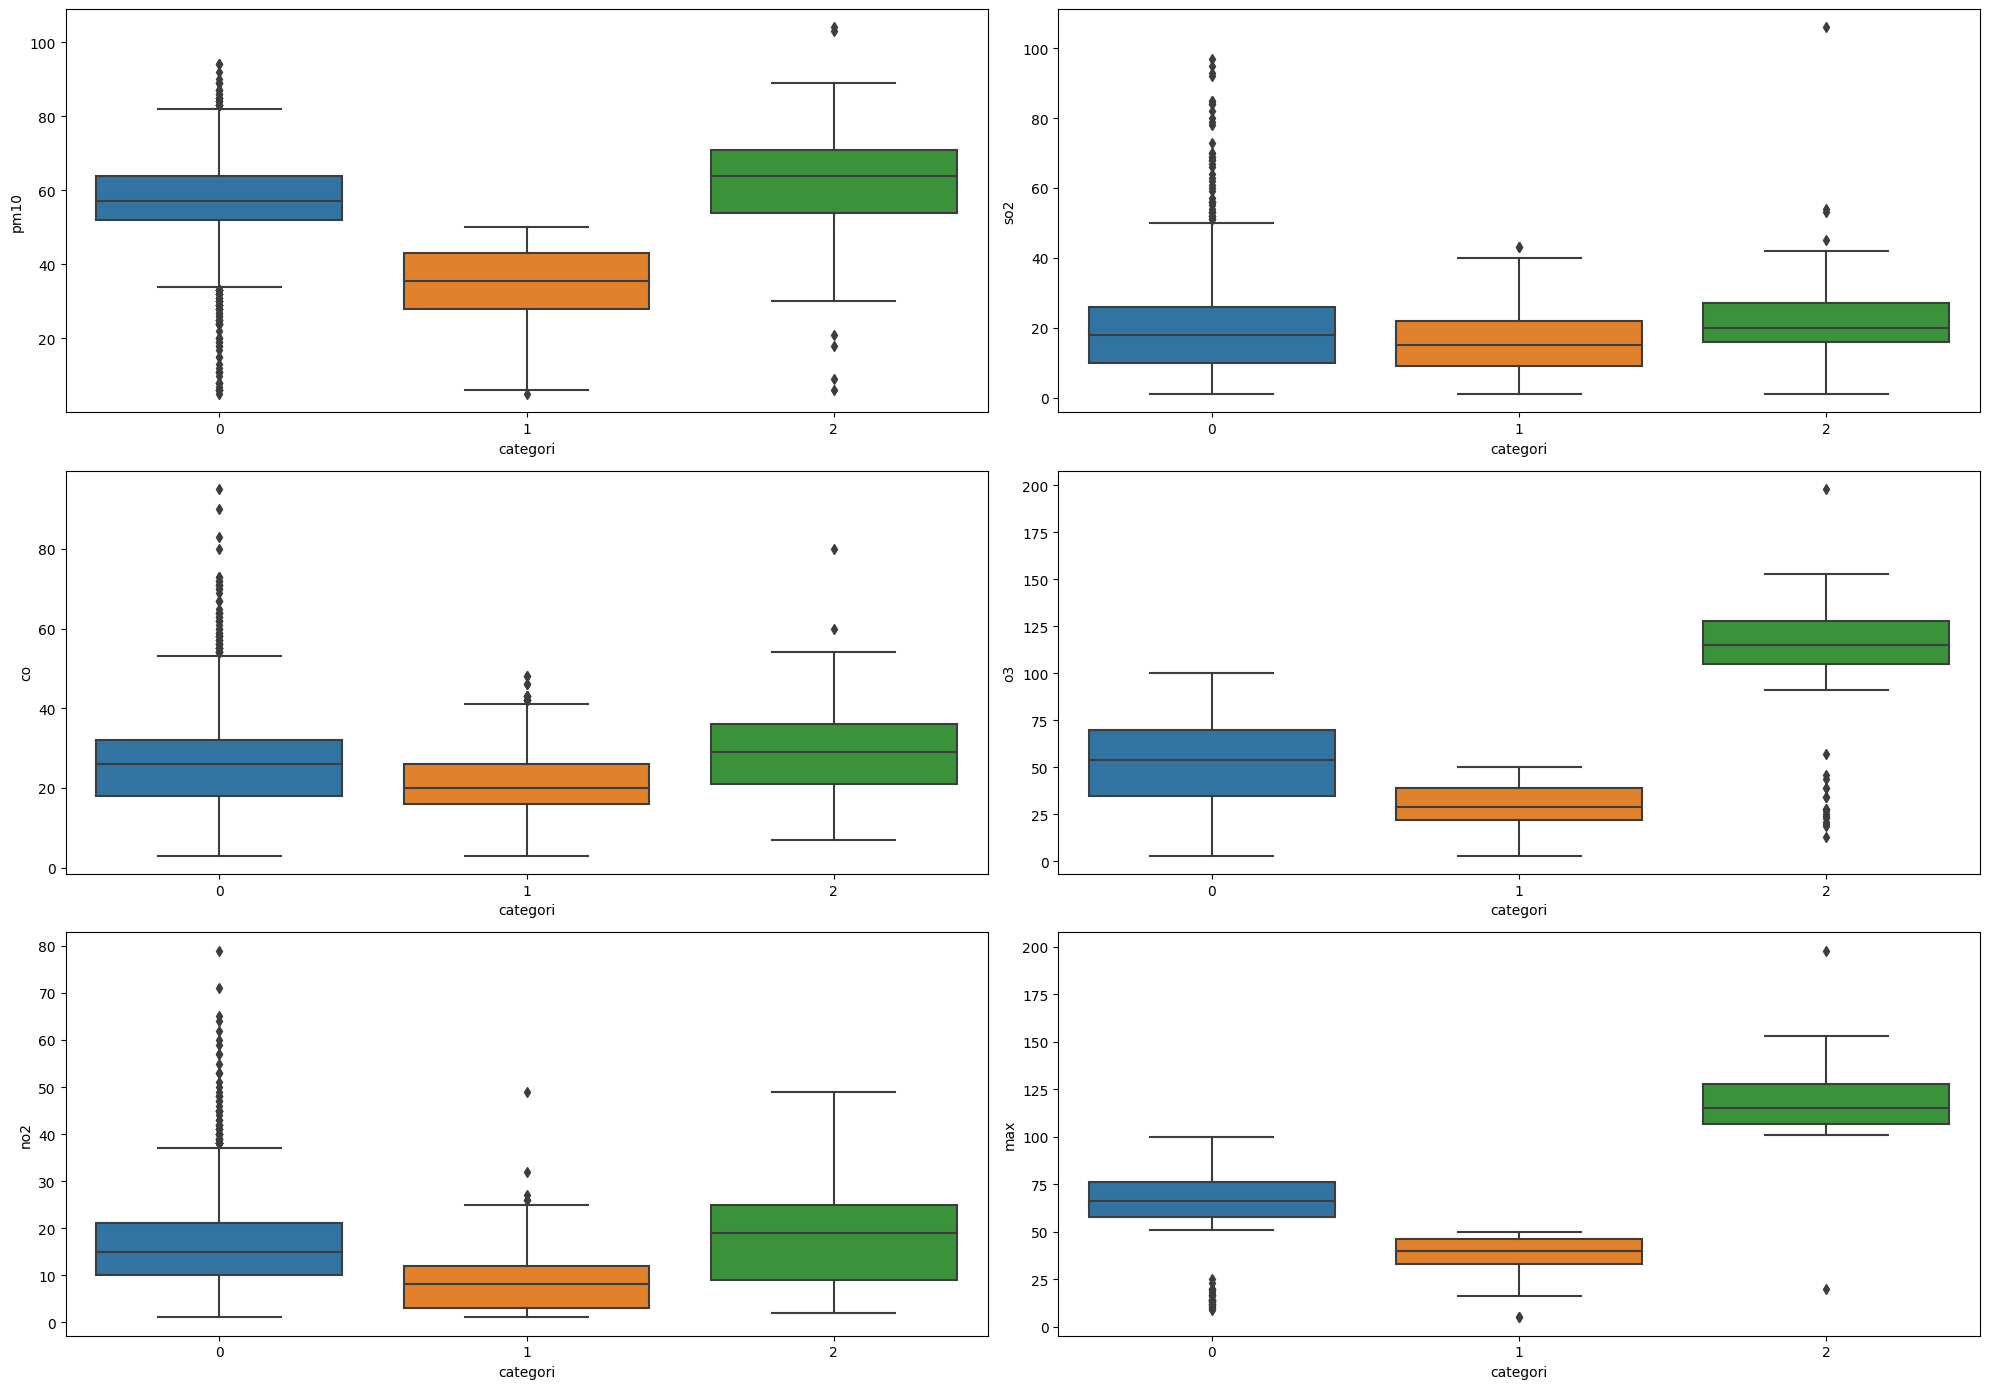

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,14))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.boxplot(data=df, x='categori', y=df[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

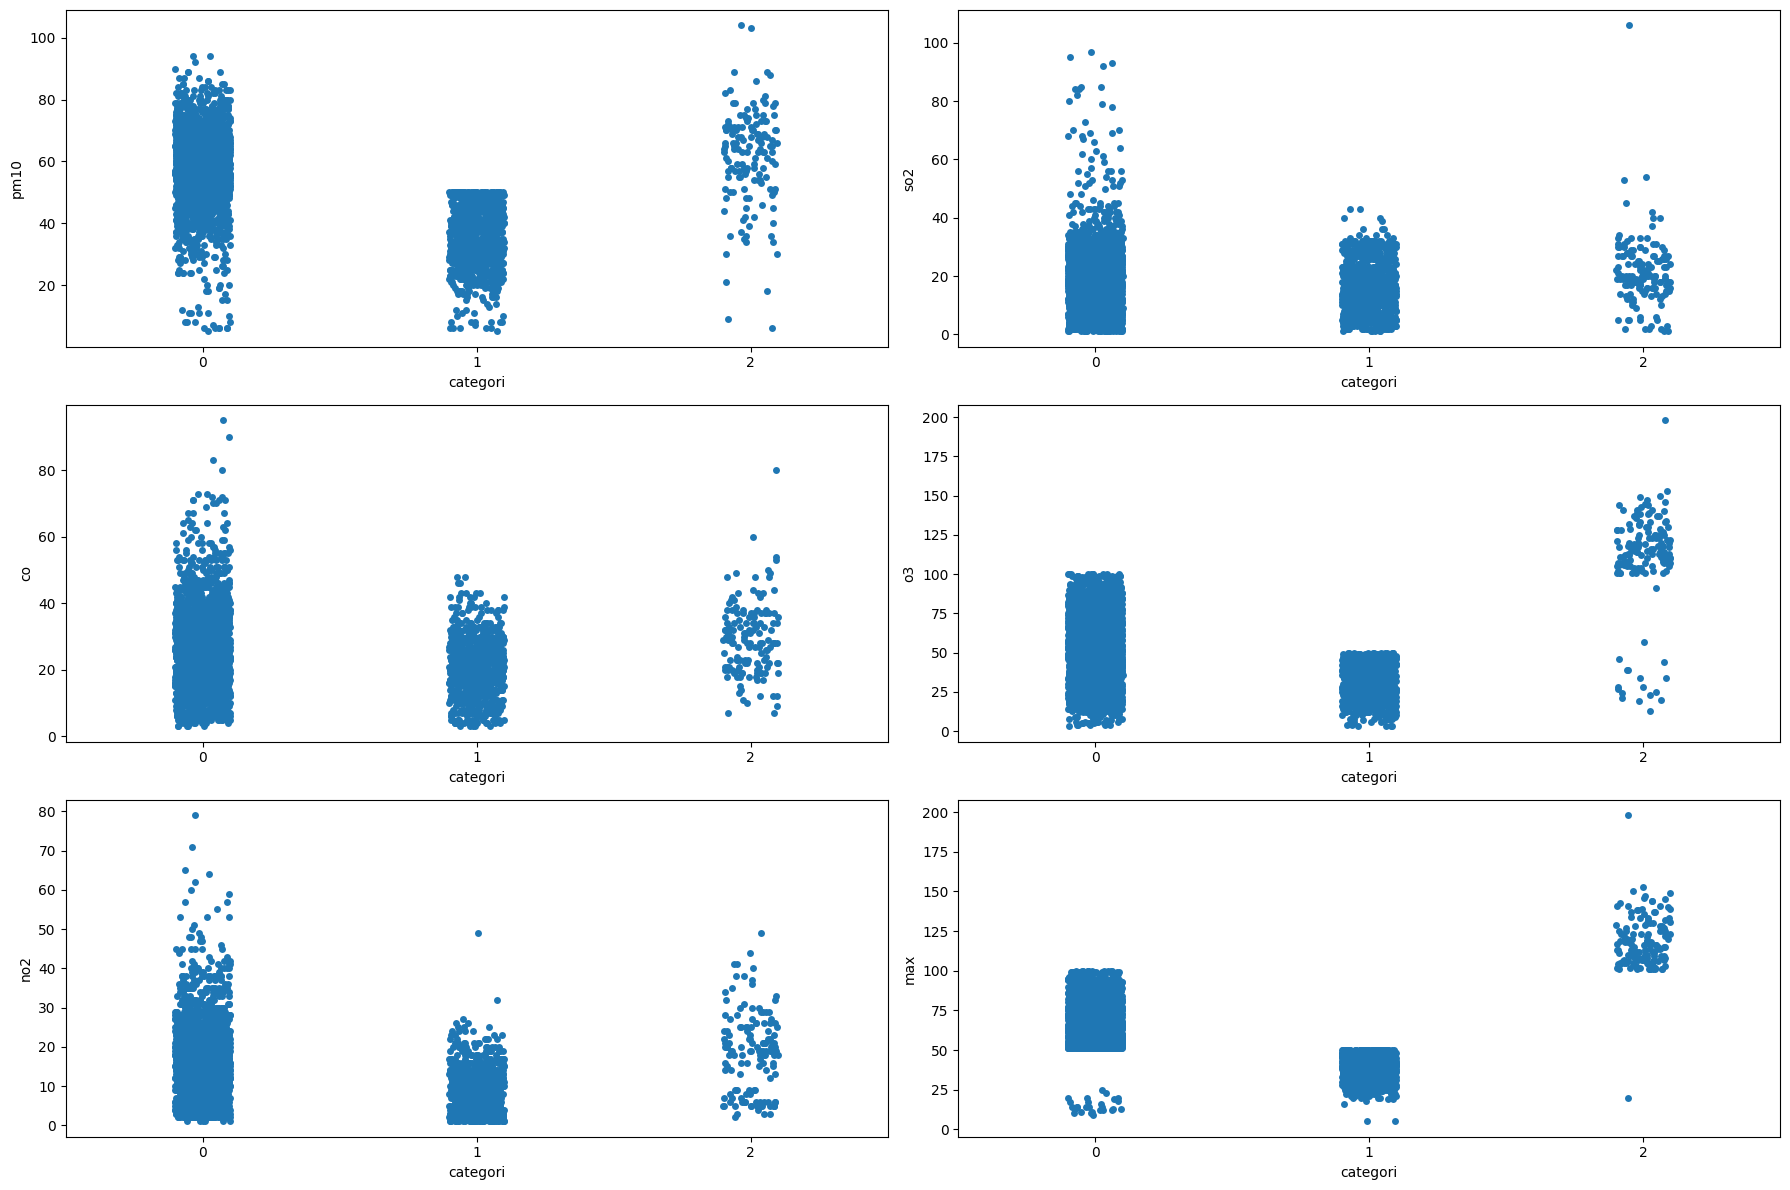

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.stripplot(data=df, x='categori', y=df[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

# Model LightGBM Classifier

In [14]:
X = df[["pm10", "so2", "co", "o3", "no2", "max"]]
y = df["categori"]

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Define the LightGBM classifier
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, verbosity=-1,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
model.fit(X_train, y_train)

LGBMClassifier(n_jobs=-1, verbosity=-1)

In [18]:
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00        35

    accuracy                           1.00       790
   macro avg       1.00      1.00      1.00       790
weighted avg       1.00      1.00      1.00       790



In [20]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 1.0000


In [21]:
y_pred_train = model.predict(X_train)

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [23]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


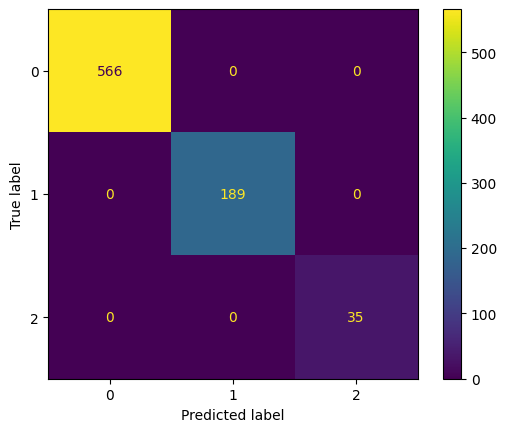

In [24]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()